<!--NOTEBOOK_HEADER-->
*This notebook contains material from [Controlling Natural Watersheds](https://jckantor.github.io/Controlling-Natural-Watersheds);
content is available [on Github](https://github.com/jckantor/Controlling-Natural-Watersheds.git).*

<!--NAVIGATION-->
< [Water Survey of Canada HYDAT Database](http://nbviewer.jupyter.org/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.01-Water_Survey_of_Canada_HYDAT_Database.ipynb) | [Contents](toc.ipynb) | [Rainy Lake Water Levels](http://nbviewer.jupyter.org/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.03-Rainy_Lake_Water_Levels.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.02-Water_Survey_of_Canada_Usage.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/Controlling-Natural-Watersheds/master/notebooks/A.02-Water_Survey_of_Canada_Usage.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# Water Survey of Canada Usage

This notebook demonstrates methods for accessing and processing data extracted from the HYDAT database. 

## Initialization

In [4]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Modules to display images and data tables
from IPython.core.display import display
from IPython.core.display import Image

# Module to request http data using Google maps api
import requests

# Module to manipulate dates for historical comparisons
import datetime

import seaborn as sns
sns.set_context('talk')

## Google API Key

In [6]:
with open ("../data/google_api_key.txt", "r") as f:
    google_api_key=f.read()

## Read Cached Data Files

Reading the cached data sets.

In [7]:
STATIONS = pd.read_pickle('../data/HYDAT_STATIONS')
LEVELS = pd.read_pickle('../data/HYDAT_LEVELS')
FLOWS = pd.read_pickle('../data/HYDAT_FLOWS')

display(STATIONS['STATION_NAME'])

STATION_NUMBER
05PA001                     KETTLE RIVER ABOVE KETTLE FALLS
05PA003                 NAMAKAN LAKE ABOVE KETTLE FALLS DAM
05PA005                       NORTHERN LIGHT LAKE AT OUTLET
05PA006             NAMAKAN RIVER AT OUTLET OF LAC LA CROIX
05PA007                     CROOKED LAKE NEAR CURTAIN FALLS
05PA010                           FRENCH LAKE NEAR ATIKOKAN
05PA011                     LAC LA CROIX AT CAMPBELL'S CAMP
05PA012                          BASSWOOD RIVER NEAR WINTON
05PA013                     NAMAKAN LAKE AT SQUIRREL ISLAND
05PB001                           SEINE RIVER NEAR LA SEINE
05PB002                 LITTLE TURTLE LAKE NEAR MINE CENTRE
05PB003                 MANITOU RIVER ABOVE DEVIL'S CASCADE
05PB004                 FOOTPRINT RIVER AT RAINY LAKE FALLS
05PB007                        RAINY LAKE NEAR FORT FRANCES
05PB009    SEINE RIVER AT STURGEON FALLS GENERATING STATION
05PB012                 LAC DES MILLE LACS ABOVE OUTLET DAM
05PB014                  

## Mapping WSC Stations in the Rainy River Watershed

The following cell creates a pandas dataframe of monitoring stations from the STATIONS.csv table extracted from the HYDAT database. The extaction searches for all stations with a specified region bounded by latitude and longitudes.

For reference, this is a map of the [Rainy River drainage](http://www.ijc.org/files/tinymce/uploaded/rl_basinmap.pdf) basin available from the International Joint Commission. 

![](../figures/IJC/rl_basinmap_640.png)

The following function maps a list of stations identified by their station numbers. In extracts latitude and longitude from the STATIONS table, then calls the google maps web api to create a map image.

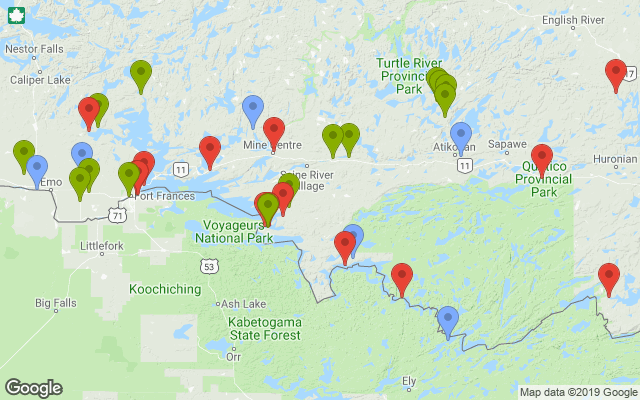

In [8]:
def mapStations(stationList,zoom=8):
    # returns a .png map image        
    locs = ["{0},{1}".format(STATIONS.loc[s,'LATITUDE'], STATIONS.loc[s,'LONGITUDE']) \
             for s in stationList]

    flows = [s for s in stationList if STATIONS.loc[s,'Flow'] == True]
    levels = [s for s in stationList if STATIONS.loc[s,'Level'] == True]
    
    rSet = set(levels).difference(set(flows))
    gSet = set(flows).difference(set(levels))
    bSet = set(levels).intersection(set(flows))

    google_maps_url = \
        "https://maps.googleapis.com/maps/api/staticmap?" + \
        f"key={google_api_key}" + \
        "&size=640x400" + \
        "&zoom={:d}".format(zoom) + \
        "&maptype=terrain" + \
        "&markers=color:red%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(STATIONS.loc[s,'LATITUDE'], \
                                   STATIONS.loc[s,'LONGITUDE']) for s in rSet]) + \
        "&markers=color:green%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(STATIONS.loc[s,'LATITUDE'], \
                                   STATIONS.loc[s,'LONGITUDE']) for s in gSet]) + \
        "&markers=color:blue%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(STATIONS.loc[s,'LATITUDE'], \
                                   STATIONS.loc[s,'LONGITUDE']) for s in bSet])

    return Image(requests.get(google_maps_url).content)


display(mapStations(STATIONS.index))

## Viewing Station Data

The HYDAT database is a collection of data associated with monitoring stations located throughout Canada. The STATIONS table contains a list of stations and attributes, including the latitude and longitude of their position. As an example, here we list attributes for 05PB007, a station monitoring the level of Rainy Lake near Fort Frances, Ontario.

In [9]:
display(STATIONS.loc['05PC018'])

STATION_NAME            RAINY RIVER AT MANITOU RAPIDS
PROV_TERR_STATE_LOC                                ON
REGIONAL_OFFICE_ID                                  5
HYD_STATUS                                          A
SED_STATUS                                        NaN
LATITUDE                                      48.6345
LONGITUDE                                    -93.9134
DRAINAGE_AREA_GROSS                             50200
DRAINAGE_AREA_EFFECT                              NaN
RHBN                                                0
REAL_TIME                                           0
CONTRIBUTOR_ID                                    647
OPERATOR_ID                                       600
DATUM_ID                                           10
Level                                            True
Flow                                             True
Name: 05PC018, dtype: object

## Plotting Level Data

Example of plotting lake level data from `HYDAT_LEVELS.csv`.

STATION_NAME            NAMAKAN LAKE ABOVE KETTLE FALLS DAM
PROV_TERR_STATE_LOC                                      ON
REGIONAL_OFFICE_ID                                        5
HYD_STATUS                                                D
SED_STATUS                                              NaN
LATITUDE                                               48.5
LONGITUDE                                          -92.6389
DRAINAGE_AREA_GROSS                                     NaN
DRAINAGE_AREA_EFFECT                                    NaN
RHBN                                                      0
REAL_TIME                                                 0
CONTRIBUTOR_ID                                          647
OPERATOR_ID                                             647
DATUM_ID                                                100
Level                                                  True
Flow                                                       
Name: 05PA003, dtype: object

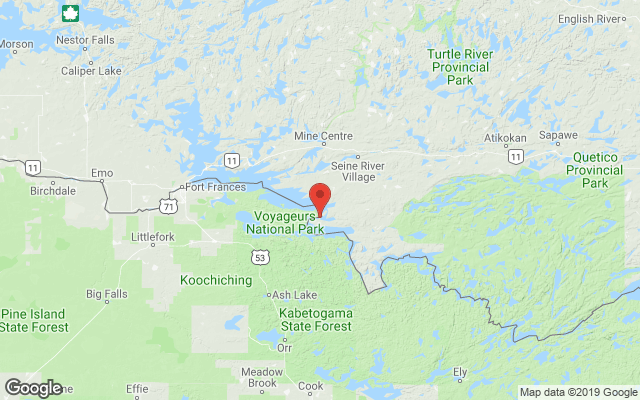

Text(0, 0.5, 'Meters')

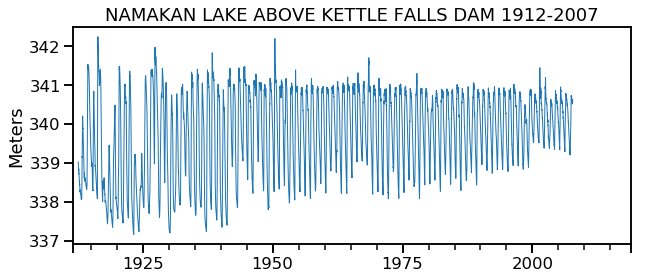

In [10]:
s = '05PA003'
display(STATIONS.loc[s])
display(mapStations([s]))

plt.figure(figsize=(10, 4))
LEVELS[s].plot(lw=1)
yrA = str(LEVELS[s].dropna().index[0].year)
yrB = str(LEVELS[s].dropna().index[-1].year)
plt.title(STATIONS.loc[s,'STATION_NAME'] + ' ' + yrA + '-' + yrB) 
plt.ylabel('Meters')

## Plotting Flow Data

Example of plotting stream flow data from `WSC_FLOWS.csv`.

STATION_NAME            RAINY RIVER AT FORT FRANCES
PROV_TERR_STATE_LOC                              ON
REGIONAL_OFFICE_ID                                5
HYD_STATUS                                        A
SED_STATUS                                      NaN
LATITUDE                                    48.6085
LONGITUDE                                  -93.4034
DRAINAGE_AREA_GROSS                           38600
DRAINAGE_AREA_EFFECT                            NaN
RHBN                                              0
REAL_TIME                                         0
CONTRIBUTOR_ID                                  647
OPERATOR_ID                                       5
DATUM_ID                                        100
Level                                              
Flow                                           True
Name: 05PC019, dtype: object

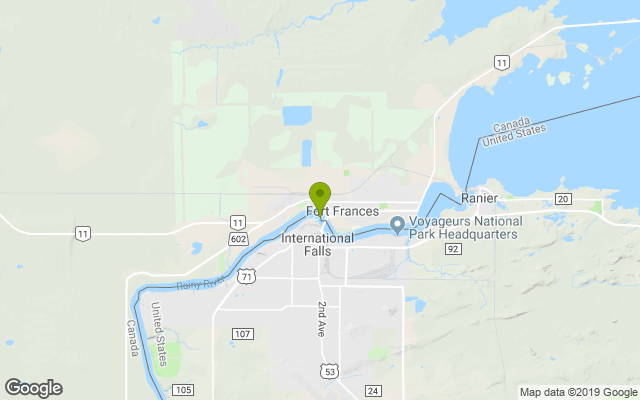

Text(0, 0.5, 'Cubic Meters per Second')

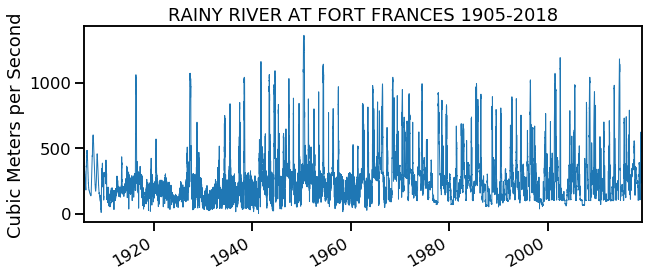

In [11]:
s = '05PC019'
display(STATIONS.loc[s])

display(mapStations([s],12))
plt.figure(figsize=(10,4))
FLOWS[s].dropna().plot(lw=1)
yrA = str(FLOWS[s].dropna().index[0].year)
yrB = str(FLOWS[s].dropna().index[-1].year)
plt.title(STATIONS.loc[s,'STATION_NAME'] + ' ' + yrA + '-' + yrB) 
plt.ylabel('Cubic Meters per Second')

## Example: Comparing Levels on Rainy and Namakan Lakes

Use of this function is demonstrated by reading and plotting the history of lake levels for Rainy and Namakan Lakes.

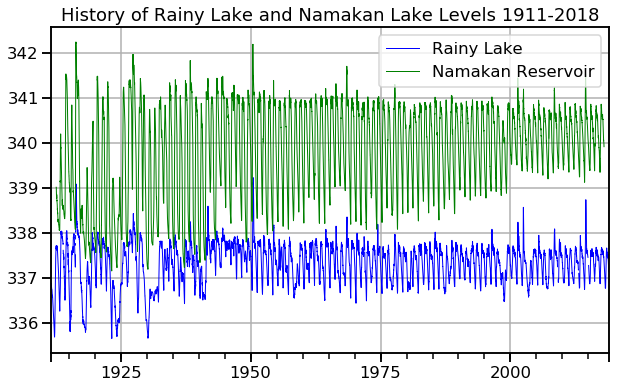

In [21]:
plt.figure(figsize=(10,6))
LEVELS['05PB007'].plot(color='blue',lw=1)   # RL at Fort Frances
LEVELS['05PA003'].plot(color='green',lw=1)  # NL at Kettle Falls
LEVELS['05PA013'].plot(color='green',lw=1)  # NL at Squirrel Island

plt.legend(['Rainy Lake','Namakan Reservoir']);
plt.title('History of Rainy Lake and Namakan Lake Levels ' +
          str(LEVELS['05PB007'].dropna().index[0].year) + 
          '-' + str(LEVELS['05PB007'].dropna().index[-1].year))
plt.grid()

## Example: What was the highest water events on Rainy Lake?

A history of high water events on Rainy Lake.

Text(0.5, 1.0, 'High Water Mark by Year: RAINY LAKE NEAR FORT FRANCES')

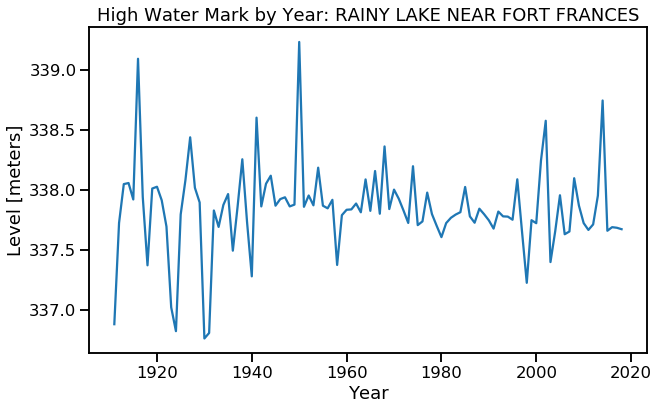

In [22]:
s = '05PB007'

high_levels = np.asarray([[yr,r.max()] for (yr,r) in LEVELS[s].groupby(LEVELS[s].index.year)])
yr,h = high_levels.transpose()

plt.figure(figsize=(10,6))
plt.plot(yr,h)
plt.xlabel('Year')
plt.ylabel('Level [meters]')
plt.title('High Water Mark by Year: ' + STATIONS['STATION_NAME'].loc[s])

## Example: Distribution of Inflows on Rainy River

Distribution of estimated historical inflows on Rainy River, comparing 1970-1999 to 2000-2014.

The use of this function is demonstrated by creating a historgram of flows on Rainy River in the period 

In [23]:
RR = FLOWS['05PC019']
RM = FLOWS['05PC018']

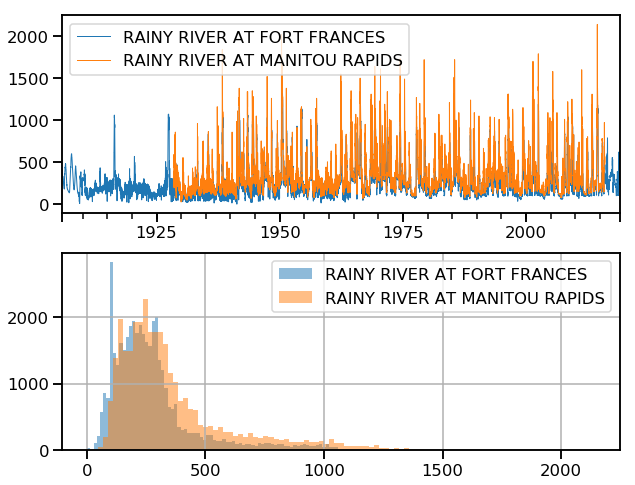

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

RR.plot(lw=1)
RM.plot(lw=1)
plt.legend([STATIONS.loc[RR.name,'STATION_NAME'], STATIONS.loc[RM.name,'STATION_NAME']])

plt.subplot(2,1,2)

RR.hist(bins=100, lw=1, alpha=0.5)
RM.hist(bins=100, lw=1, alpha=0.5)

plt.legend([STATIONS.loc[RR.name,'STATION_NAME'], STATIONS.loc[RM.name,'STATION_NAME']])

### Ungaged Inflows to Rainy River

Text(0.5, 1.0, 'Difference in Flow on Rainy River between Manitou Rapids and Ft. Frances')

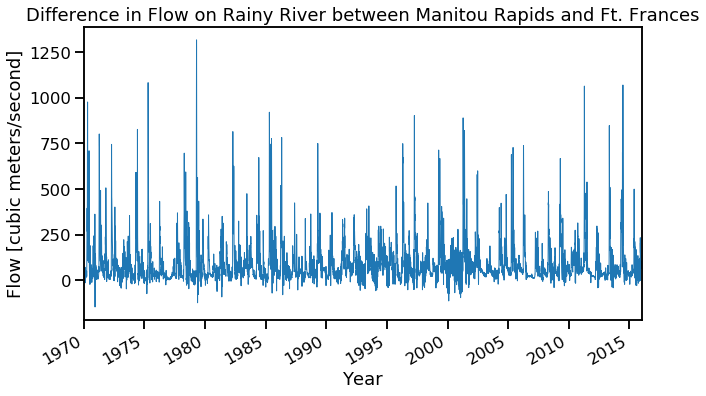

In [26]:
A = '05PC019'   # Rainy River at Ft. Frances
B = '05PC018'   # Rainy River at Manitou Rapids

FLOW = (FLOWS[B] - FLOWS[A]).dropna()

plt.figure(figsize=(10,6))
FLOW['1970':].plot(lw=1)

plt.xlabel('Year')
plt.ylabel('Flow [cubic meters/second]')
plt.title('Difference in Flow on Rainy River between Manitou Rapids and Ft. Frances')

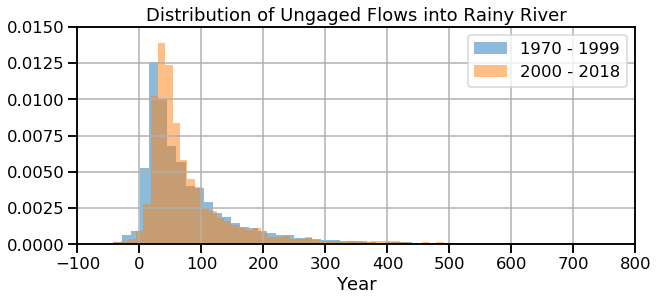

In [27]:
plt.figure(figsize=(10,4))

FLOW['1970':'1999'].hist(bins=100, density=1, alpha=0.5)
plt.ylim([0,.015])
plt.xlim([-100,800])

FLOW['2000':].hist(bins=100, density=1, alpha=0.5)
plt.ylim([0,.015])
plt.xlim([-100,800])

plt.title('Distribution of Ungaged Flows into Rainy River')
plt.xlabel('Year')
plt.legend(['1970 - 1999','2000 - 2018'])

Text(0.5, 1.0, 'Frequency-Flow Diagram for Ungaged Inflows to Rainy River')

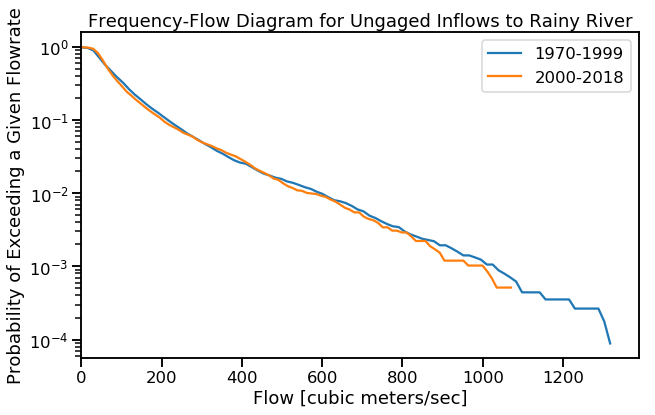

In [29]:
plt.figure(figsize=(10,6))

FLOW = FLOWS[B] - FLOWS[A]

hist,bins = np.histogram([q for q in FLOW['1970':'2000'] if pd.notnull(q)],bins = 100)
chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
plt.semilogy(bins[1:],chist)

hist,bins = np.histogram([q for q in FLOW['2000':'2018'] if pd.notnull(q)],bins = 100)
chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
plt.semilogy(bins[1:],chist)
plt.xlim([0,plt.xlim()[1]])

plt.xlim([0,plt.xlim()[1]])

plt.legend(['1970-1999','2000-2018'])

plt.ylabel('Probability of Exceeding a Given Flowrate')
plt.xlabel('Flow [cubic meters/sec]')
plt.title('Frequency-Flow Diagram for Ungaged Inflows to Rainy River')

## Example: Flow-Frequency for State-of-Nature Streams in the Rainy River Watershed

Flow-frequency behavior for unencumbered streams in the Rainy River Watershed, comparing 1970-1999 to 2000-2014.

05PA006NAMAKAN RIVER AT OUTLET OF LAC LA CROIX           19212018
05PA012BASSWOOD RIVER NEAR WINTON                        19242015
05PB001SEINE RIVER NEAR LA SEINE                         19141926
05PB003MANITOU RIVER ABOVE DEVIL'S CASCADE               19141915
05PB004FOOTPRINT RIVER AT RAINY LAKE FALLS               19141916
05PB009SEINE RIVER AT STURGEON FALLS GENERATING STATION  19632018
05PB014TURTLE RIVER NEAR MINE CENTRE                     19142017
05PB015PIPESTONE RIVER ABOVE RAINY LAKE                  19631998
05PB018ATIKOKAN RIVER AT ATIKOKAN                        19782015
05PB019NORTHEAST TRIBUTARY TO DASHWA LAKE NEAR ATIKOKAN  19861986
05PB020EASTERN TRIBUTARY TO DASHWA LAKE NEAR ATIKOKAN    19861986
05PB021EYE RIVER NEAR HARDTACK LAKE NORTH OF ATIKOKAN    19851994
05PB022EYE RIVER NEAR COULSON LAKE NORTH OF ATIKOKAN     19851993
05PC009LA VALLEE RIVER AT LA VALLEE                      19521959
05PC010STURGEON RIVER NEAR BARWICK                       19521986
05PC016LA 

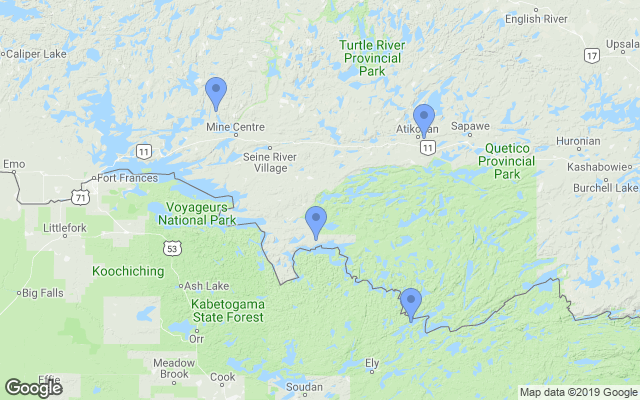

05PA006NAMAKAN RIVER AT OUTLET OF LAC LA CROIX           19212018
05PA012BASSWOOD RIVER NEAR WINTON                        19242015
05PB014TURTLE RIVER NEAR MINE CENTRE                     19142017
05PB018ATIKOKAN RIVER AT ATIKOKAN                        19782015


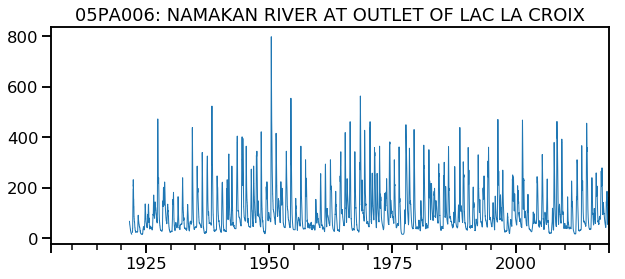

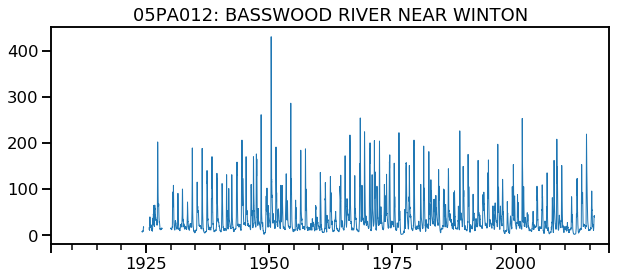

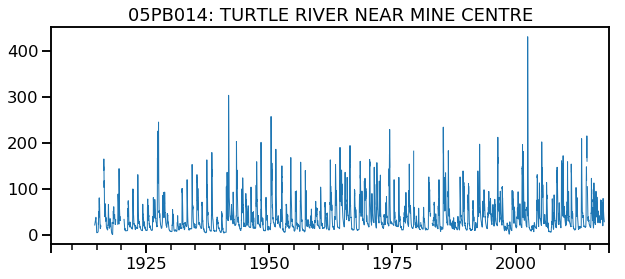

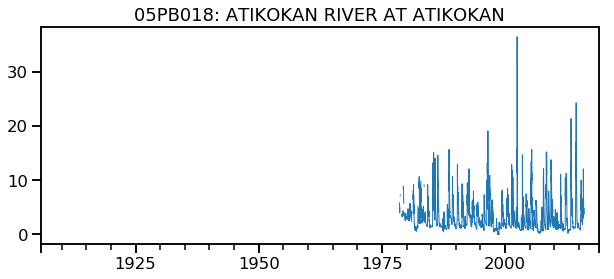

In [30]:
stationList = ['05PA006','05PA012','05PB001','05PB003','05PB004','05PB009',
               '05PB014','05PB015','05PB018','05PB019','05PB020','05PB021',
               '05PB022','05PC009','05PC010','05PC016','05PC022']

for s in stationList:
    print(s,end='')
    print("{0:50s}".format(STATIONS.loc[s]['STATION_NAME']),end='')
    print(FLOWS[s].dropna().index[0].year,end='')
    print(FLOWS[s].dropna().index[-1].year)
    
stationList = ['05PA006','05PA012','05PB014','05PB018']
display(mapStations(stationList))

for s in stationList:
    print(s,end='')
    print("{0:50s}".format(STATIONS.loc[s]['STATION_NAME']),end='')
    print(FLOWS[s].dropna().index[0].year,end='')
    print(FLOWS[s].dropna().index[-1].year)

for s in stationList:
    plt.figure(figsize=(10,4))
    FLOWS[s].plot(lw=1)
    plt.title(s + ': ' + STATIONS.loc[s]['STATION_NAME'])

STATION_NAME            NAMAKAN RIVER AT OUTLET OF LAC LA CROIX
PROV_TERR_STATE_LOC                                          ON
REGIONAL_OFFICE_ID                                            5
HYD_STATUS                                                    A
SED_STATUS                                                  NaN
LATITUDE                                                48.3826
LONGITUDE                                              -92.1763
DRAINAGE_AREA_GROSS                                       13400
DRAINAGE_AREA_EFFECT                                        NaN
RHBN                                                          0
REAL_TIME                                                     1
CONTRIBUTOR_ID                                              647
OPERATOR_ID                                                 647
DATUM_ID                                                     95
Level                                                      True
Flow                                    

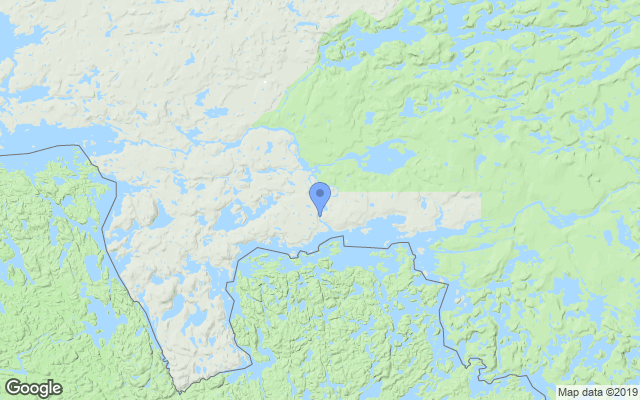

/bin/sh: convert: command not found


STATION_NAME            BASSWOOD RIVER NEAR WINTON
PROV_TERR_STATE_LOC                             ON
REGIONAL_OFFICE_ID                               5
HYD_STATUS                                       A
SED_STATUS                                     NaN
LATITUDE                                   48.0826
LONGITUDE                                 -91.6512
DRAINAGE_AREA_GROSS                           4510
DRAINAGE_AREA_EFFECT                           NaN
RHBN                                             0
REAL_TIME                                        0
CONTRIBUTOR_ID                                 647
OPERATOR_ID                                    600
DATUM_ID                                        10
Level                                         True
Flow                                          True
Name: 05PA012, dtype: object

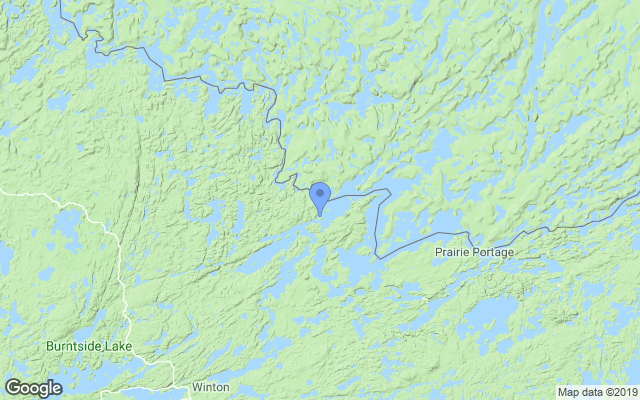

/bin/sh: convert: command not found


STATION_NAME            TURTLE RIVER NEAR MINE CENTRE
PROV_TERR_STATE_LOC                                ON
REGIONAL_OFFICE_ID                                  5
HYD_STATUS                                          A
SED_STATUS                                        NaN
LATITUDE                                      48.8502
LONGITUDE                                    -92.7238
DRAINAGE_AREA_GROSS                              4770
DRAINAGE_AREA_EFFECT                              NaN
RHBN                                                1
REAL_TIME                                           1
CONTRIBUTOR_ID                                    647
OPERATOR_ID                                       647
DATUM_ID                                           10
Level                                            True
Flow                                             True
Name: 05PB014, dtype: object

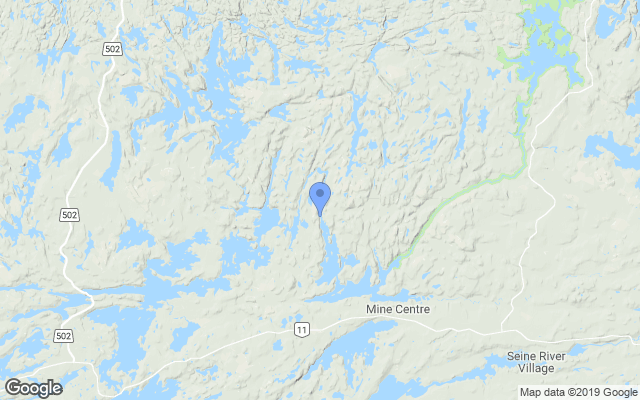

/bin/sh: convert: command not found


STATION_NAME            ATIKOKAN RIVER AT ATIKOKAN
PROV_TERR_STATE_LOC                             ON
REGIONAL_OFFICE_ID                               5
HYD_STATUS                                       A
SED_STATUS                                     NaN
LATITUDE                                    48.752
LONGITUDE                                 -91.5841
DRAINAGE_AREA_GROSS                            358
DRAINAGE_AREA_EFFECT                           NaN
RHBN                                             0
REAL_TIME                                        1
CONTRIBUTOR_ID                                 480
OPERATOR_ID                                    647
DATUM_ID                                       129
Level                                         True
Flow                                          True
Name: 05PB018, dtype: object

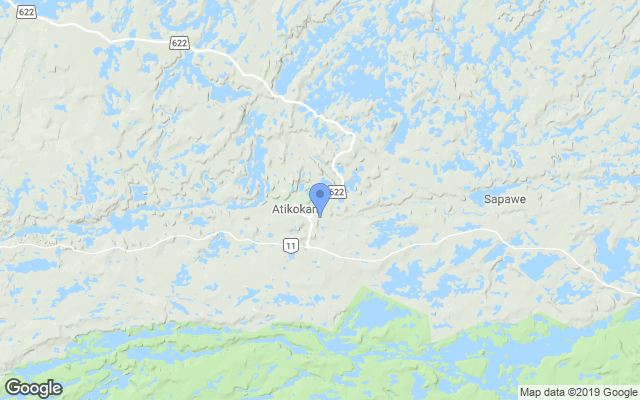

/bin/sh: convert: command not found


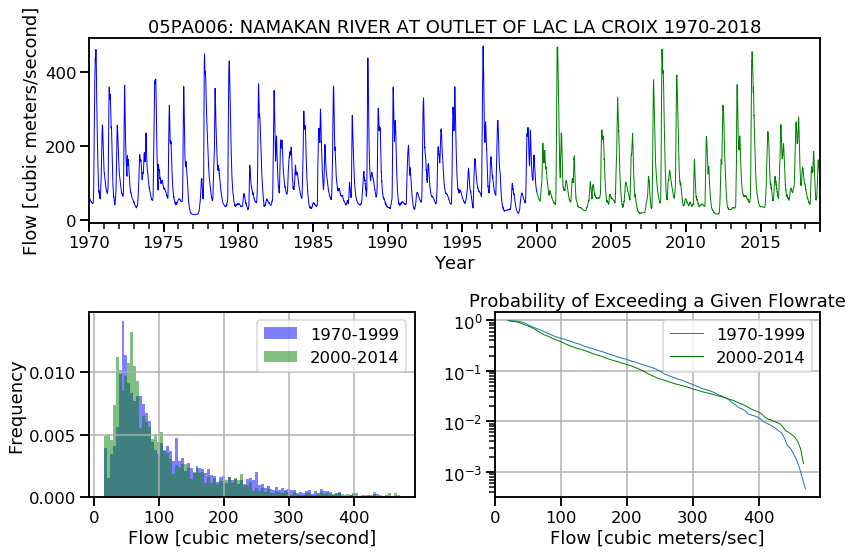

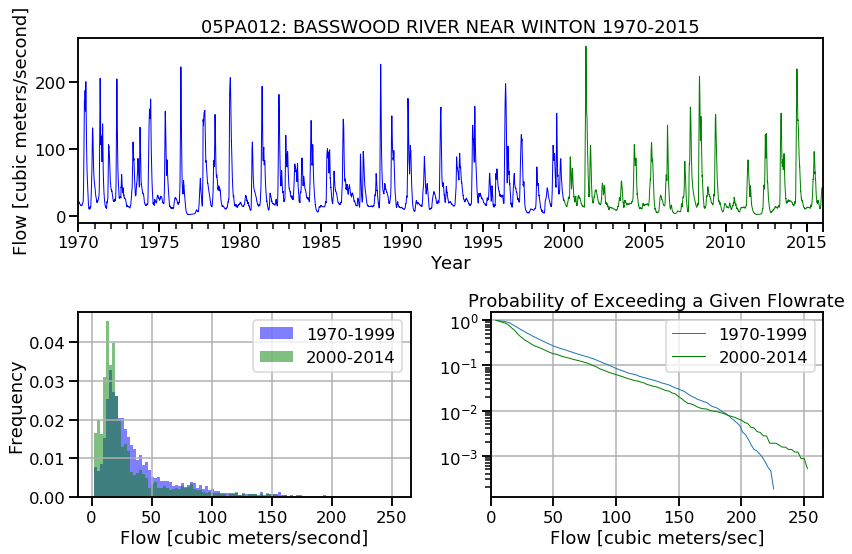

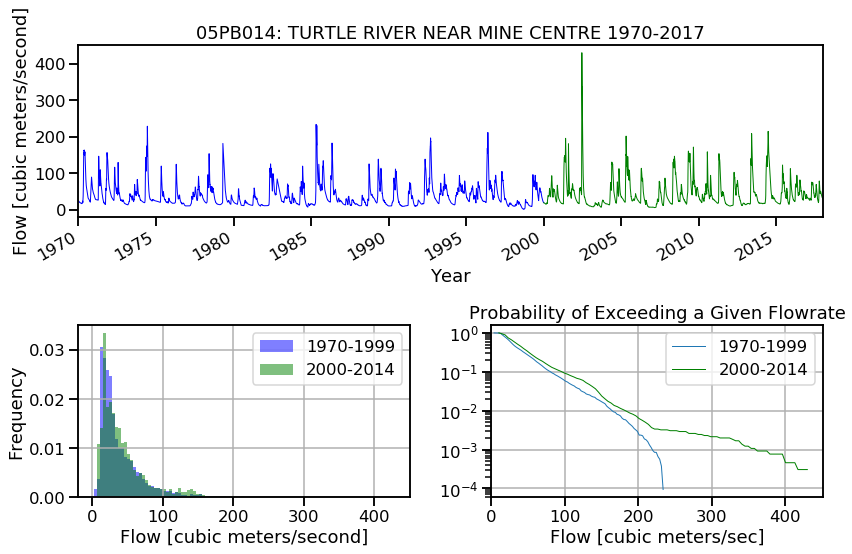

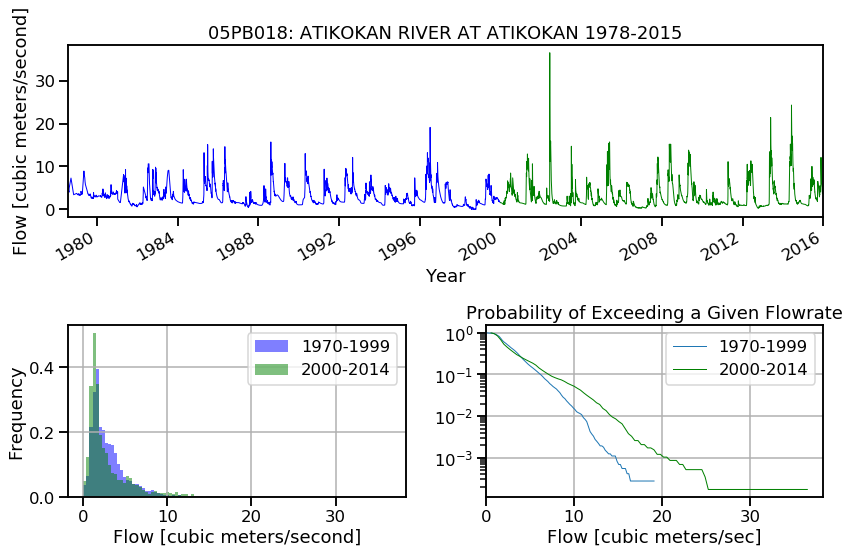

In [32]:
def FlowFrequency(s):
    
    display(STATIONS.loc[s])
    display(mapStations([s],10))

    FLOW = FLOWS[s]['1970':'2018'].dropna()
    # select period of year
    FLOW = FLOW.loc[FLOW.index.dayofyear >= 1] # 135]
    FLOW = FLOW.loc[FLOW.index.dayofyear <= 366] # 196]

    # show data
    plt.figure(figsize=(12,8))
    plt.subplot2grid((2,2), (0,0), colspan=2)
    FLOW[:'1999'].plot(color='b', lw=1)
    
    FLOW['2000':].plot(color='g', lw=1)    
    plt.xlabel('Year')
    plt.ylabel('Flow [cubic meters/second]')
    plt.title(s + ': ' + STATIONS.loc[s,'STATION_NAME'] + 
              ' ' + str(FLOW.index[0].year) + '-' + str(FLOW.index[-1].year))
    
    # histogram distribution of flows
    plt.subplot2grid((2,2),(1,0))

    hist,bins = np.histogram(FLOW,bins=100)
    FLOW['1970':'1999'].hist(bins=bins, density=1, color='b', alpha=0.5,lw=1)
    FLOW['2000':].hist(bins=bins, density=1, color='g', alpha=0.5,lw=1)
    plt.ylabel('Frequency')
    plt.xlabel('Flow [cubic meters/second]')
    plt.legend(['1970-1999','2000-2014'])
    plt.tight_layout()
    
    # flow-frequency plots
    plt.subplot2grid((2,2),(1,1))

    hist,bins = np.histogram(FLOW['1970':'1999'],bins = 100)
    chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
    plt.semilogy(bins[1:],chist,lw=1)
    hist,bins = np.histogram(FLOW['2000':],bins = 100)
    chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
    plt.semilogy(bins[1:],chist,color='g',lw=1)
    plt.xlim([0,plt.xlim()[1]])
    plt.legend(['1970-1999','2000-2014'])
    plt.title('Probability of Exceeding a Given Flowrate')
    plt.xlabel('Flow [cubic meters/sec]')

    plt.grid()
    plt.tight_layout()
    
    fname = '../figures/FlowFrequency_' + s + '.png'
    plt.savefig(fname)
    !convert $fname -trim $fname

for s in stationList:
    FlowFrequency(s)

## Annual flows on Rainy River

Trends in annual flow on Rainy River.

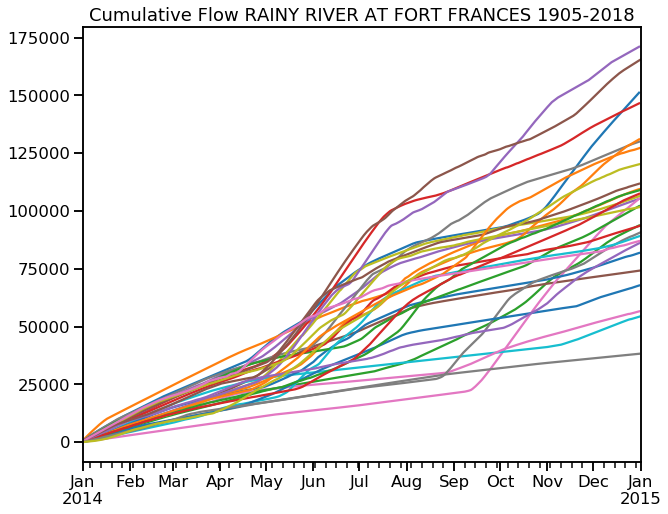

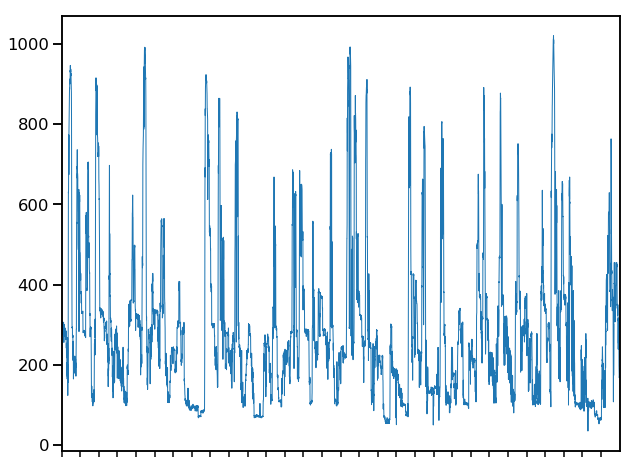

In [34]:
s='05PC019'
FLOW = FLOWS[s]

plt.figure(figsize=(10,8))
plt.subplot(1,1,1)

yrA = str(FLOWS[s].dropna().index[0].year)
yrB = str(FLOWS[s].dropna().index[-1].year)
plt.title('Cumulative Flow ' + STATIONS.loc[s,'STATION_NAME']
          + ' ' + str(FLOWS[s].dropna().index[0].year) 
          + '-' + str(FLOWS[s].dropna().index[-1].year)) 

for (yr,r) in FLOW['1971':'1999'].groupby(FLOW['1971':'1999'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()

plt.figure(figsize=(10,8))
FLOW['1970':'1999'].plot(lw=1)
    

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#fname = img + 'RuleCurvePerformance1970-1999.png'

#plt.savefig(fname)
#!convert $fname -trim $fname


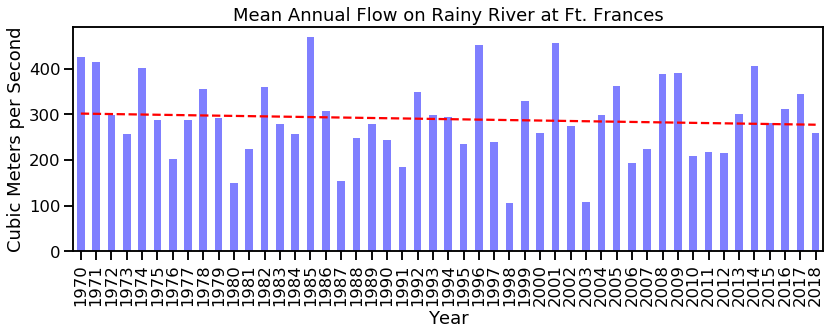

In [70]:
plt.figure(figsize=(12,5))
F = FLOW['1970':].groupby(FLOW['1970':].index.year).mean()

import statsmodels.api as sm

x = F.index
y = F.values

x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
est.summary()

ypred = est.params[0] + F.index*est.params[1]

ax = F.plot(kind='bar',color='b',alpha=0.5)
ax.plot(ax.get_xticks(),ypred,'r--')

plt.title('Mean Annual Flow on Rainy River at Ft. Frances')
plt.xlabel('Year')
plt.ylabel('Cubic Meters per Second')

plt.tight_layout()

In [71]:
regressors = sm.tools.tools.add_constant(x)
r = sm.OLS(y,regressors).fit()

print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3307
Date:                Fri, 16 Aug 2019   Prob (F-statistic):              0.568
Time:                        05:13:58   Log-Likelihood:                -287.53
No. Observations:                  49   AIC:                             579.1
Df Residuals:                      47   BIC:                             582.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1301.1494   1759.533      0.739      0.4

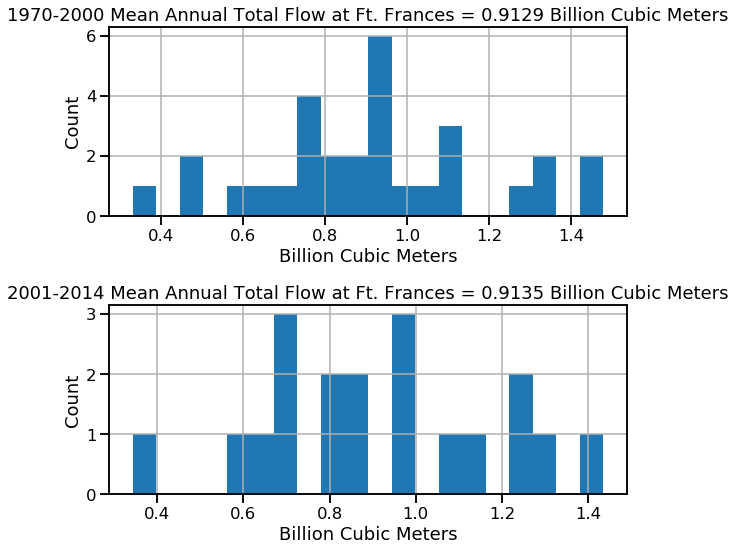

In [72]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

A = FLOW['1970':'1999']
B = FLOW['2000':]

totalflow = 24*3600*A.groupby(A.index.year).sum()/10e9
totalflow.hist(bins=20)
plt.title('1970-2000 Mean Annual Total Flow at Ft. Frances = ' + "{:5.4f}".format(totalflow.mean()) + ' Billion Cubic Meters')
plt.xlabel('Billion Cubic Meters')
plt.ylabel('Count')

plt.subplot(2,1,2)
totalflow = 24*3600*B.groupby(B.index.year).sum()/10e9
totalflow.hist(bins=20)
plt.title('2001-2014 Mean Annual Total Flow at Ft. Frances = ' + "{:5.4f}".format(totalflow.mean()) + ' Billion Cubic Meters')
plt.xlabel('Billion Cubic Meters')
plt.ylabel('Count')

plt.tight_layout()

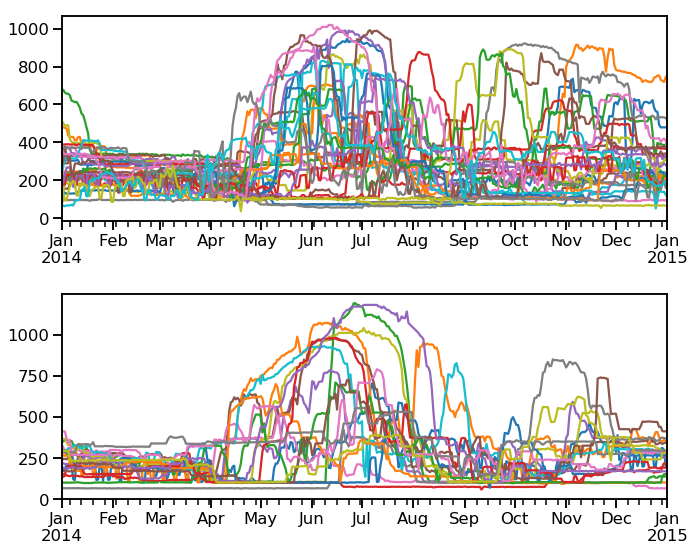

In [73]:
plt.figure(figsize=(10,8))

A = FLOW['1970':'1999']
B = FLOW['2000':]

plt.subplot(2,1,1)

for (yr,r) in A.groupby(A.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    
plt.subplot(2,1,2)

for (yr,r) in B.groupby(B.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()

plt.tight_layout()

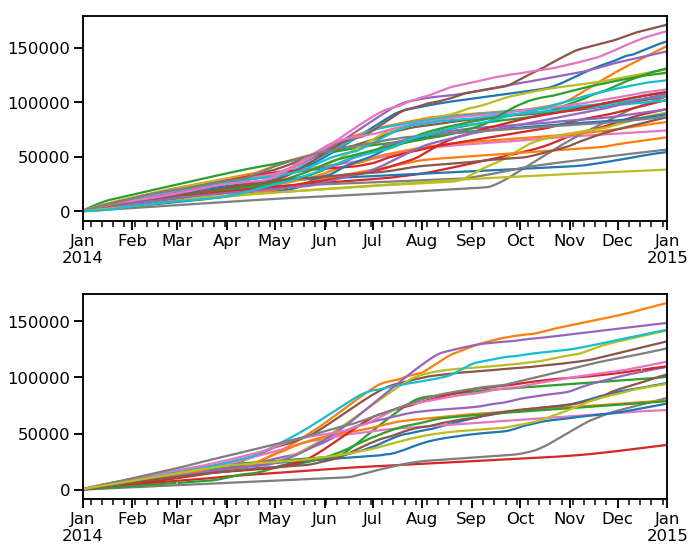

In [74]:
plt.figure(figsize=(10,8))

A = FLOW['1970':'1999']
B = FLOW['2000':]

plt.subplot(2,1,1)

for (yr,r) in A.groupby(A.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()
    
plt.subplot(2,1,2)

for (yr,r) in B.groupby(B.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()

plt.tight_layout()

<!--NAVIGATION-->
< [Water Survey of Canada HYDAT Database](http://nbviewer.jupyter.org/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.01-Water_Survey_of_Canada_HYDAT_Database.ipynb) | [Contents](toc.ipynb) | [Rainy Lake Water Levels](http://nbviewer.jupyter.org/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.03-Rainy_Lake_Water_Levels.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/Controlling-Natural-Watersheds/blob/master/notebooks/A.02-Water_Survey_of_Canada_Usage.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://raw.githubusercontent.com/jckantor/Controlling-Natural-Watersheds/master/notebooks/A.02-Water_Survey_of_Canada_Usage.ipynb"><img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>